# Kalman Filter / Simulation 

**Source**

`A Kalman Filtering Tutorial for Undergraduate Students`; authors: Matthew B. Rhudy, Roger A. Salguero, Keaton Holappa

International Journal of Computer Science & Engineering Survey Vol.8, No.1 February 2017




## General form of a Kalman filter

$$\begin{align}
\mathbf{x}_k &= \mathbf{F} \cdot \mathbf{x}_{k-1} + \mathbf{U} \cdot \mathbf{u}_{k-1} + \mathbf{w}_{k-1} \\
\mathbf{y}_k &= \mathbf{H} \cdot \mathbf{x}_k + \mathbf{v}_k
\end{align}
$$

|  Variable    | Description              | Dimension        |
|:-------------|:-------------------------|:-----------------|
| $\mathbf{x}$ | State vector             | $n_x \times 1$   |
| $\mathbf{y}$ | Output vector            | $n_y \times 1$   |
| $\mathbf{u}$ | Input vector             | $n_u \times 1$   |
| $\mathbf{w}$ | Process noise vector     | $n_x \times 1$   |
| $\mathbf{v}$ | Measurement noise vector | $n_y \times 1$   |
| $\mathbf{F}$ | State matrix             | $n_x \times n_x$ |
| $\mathbf{G}$ | Input matrix             | $n_x \times n_u$ |
| $\mathbf{H}$ | Observation matrix       | $n_y \times n_x  |

Indices refer to time instants. Time instant $t = k \cdot \Delta t$ is abbreviated to `k` while index `k-1` denotes time instant $t = (k - 1) \cdot \Delta t$.

**Purpose of the Kalman filter**

The Kalman filter estimates the system state $\mathbf{x}_k$ using the previous state. Using knowledge of uncertainties of the states, process noise,  measurements and measurement noise permits to obtain an overall estimate that minimises the variance of the system state.

## Prediction 

The predicted state at time instant `k` is denoted $\mathbf{x}_{k|k-1}$. It is computed from equation

$$
\mathbf{\hat{{x}}}_{k|k-1} = \mathbf{F} \cdot \mathbf{x}_{k-1} + \mathbf{U} \cdot \mathbf{u}_{k-1} + \mathbf{w}_{k-1}
$$

$\mathbf{x}_{k-1}$ shall be interpreted as a random vector with mean $\mathbf{\mu_x}_{k-1}$. Similarly $\mathbf{\hat{{x}}}_{k|k-1}$ is a random vector with mean $\mathbf{\hat \mu_x}_{k-1}$.

We compute the covariance of the estimated state vector $\mathbf{\hat{{x}}}_{k|k-1}$.

$$
E\left( \left(\mathbf{\hat{{x}}}_{k|k-1} -  \mathbf{\hat \mu_x}_{k-1}\right) \cdot \left(\mathbf{\hat{{x}}}_{k|k-1} -  \mathbf{\hat \mu_x}_{k-1}\right)^T \right)
$$

The mean vector $\mathbf{\hat \mu_x}_{k-1}$ can be expressed like this:

$$\begin{align}
\mathbf{\hat \mu_x}_{k-1} &= \mathbf{F} \cdot \mathbf{\mu_x}_{k-1} + \mathbf{U} \cdot \mathbf{u}_{k-1} + \underbrace{E(\mathbf{w}_{k-1})}_{0} \\
&= \mathbf{F} \cdot \mathbf{\mu_x}_{k-1} + \mathbf{U} \cdot \mathbf{u}_{k-1}
\end{align}
$$

Then we may express $\mathbf{\hat{{x}}}_{k|k-1} -  \mathbf{\hat \mu_x}_{k-1}$ in this form:

$$\begin{align}
\mathbf{\hat{{x}}}_{k|k-1} -  \mathbf{\hat \mu_x}_{k-1} &= \mathbf{F} \cdot \mathbf{x}_{k-1} + \mathbf{U} \cdot \mathbf{u}_{k-1} + \mathbf{w}_{k-1} -\mathbf{F} \cdot \mathbf{\mu_x}_{k-1} - \mathbf{U} \cdot \mathbf{u}_{k-1} \\
&= \mathbf{F} \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) + \mathbf{w}_{k-1}
\end{align}
$$


$$
E\left( \left(\mathbf{F} \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) + \mathbf{w}_{k-1} \right) \cdot \left(\mathbf{F} \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) + \mathbf{w}_{k-1} \right)^T  \right) =
 \mathbf{F} \cdot E\left( \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right)^T \right) \cdot \mathbf{F}^T + E\left(\mathbf{w}_{k-1} \cdot \mathbf{w}_{k-1}^T  \right) 
$$

In this equation there are three covariance matrices:

$$\begin{align}
\mathbf{P}_{k|k-1} &= E\left( \left(\mathbf{F} \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) + \mathbf{w}_{k-1} \right) \cdot \left(\mathbf{F} \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) + \mathbf{w}_{k-1} \right)^T  \right)  \\
\mathbf{P}_{k-1} &= E\left( \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right) \cdot \left(\mathbf{x}_{k-1} - \mathbf{\mu_x}_{k-1}\right)^T \right) \\
\mathbf{Q}_{k-1} = E\left(\mathbf{w}_{k-1} \cdot \mathbf{w}_{k-1}^T  \right)
\end{align}
$$

Hence the estimate of the covariance matrix becomes:

$$
\mathbf{P}_{k|k-1} = \mathbf{F} \cdot \mathbf{P}_{k-1} \cdot \mathbf{F}^T + \mathbf{Q}_{k-1}
$$

**Summary of the prediction step**

1) compute the new estimated state from equation:

$$
\mathbf{\hat{{x}}}_{k|k-1} = \mathbf{F} \cdot \mathbf{x}_{k-1} + \mathbf{U} \cdot \mathbf{u}_{k-1}
$$

2) compute an update of the covariance matrix:

$$
\mathbf{P}_{k|k-1} = \mathbf{F} \cdot \mathbf{P}_{k-1} \cdot \mathbf{F}^T + \mathbf{Q}_{k-1}
$$

---


## Derivation of Kalman Gain

still missing

---

## Measurement

still missing

---

## Update / Measurement Fusion


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Simulation parameters

N = 1000 # nr of steps in simulation
dt = 0.001 # time steps in [s]
tvec = np.arange(N) *dt  # time vector [s]

# system matrix (state)
Fmat = np.array([[1, dt], [0, 1]])
# system matrix  (input)
Gmat = np.array([[-0.5 * dt**2], [-dt]])
# observation / measurement / output matrix 
Hmat = np.array([[1, 0]])
# process noise - covariance matrix
Qmat = np.array([[0, 0], [0, 0]])
# input 
u_inp = np.array([9.80665]) # acceleration due to gravity
# identity matrix
Imat = np.eye(2)

# initial position y0 [m] and velocity v0 [m/s]
y0 = 100
v0 = 0

# initialise state vector and set start vector 
xt = np.zeros((2, N))
xt[:, 0] = np.array([y0, v0])

# calculate states for time instants n > 0
for n in range(1, N):
    xt[:, n] = Fmat @ xt[:, n-1] + Gmat @ u_inp

noise_var = 4.0
rng1 = np.random.default_rng()
noise = rng1.normal(loc=0.0, scale=math.sqrt(noise_var), size=N)

position_measured = xt[0, :] + noise
# initialise state vector (estimation) and set start vector 
xe = np.zeros((2, N))
y0e = 105.0
v0e = 0.0
xe[:, 0] = np.array([y0e, v0e])

# initialise covariance matrix 
Pmat = np.array([[10, 0], [0, 0.01]])

for n in range(1, N):
    # predict state vector
    xe[:, n] = Fmat @ xe[:, n-1] + Gmat @ u_inp
    # predict covariance
    Pmat = Fmat @ Pmat @ Fmat.T + Qmat
    # calculate Kalman gain matrix
    Kmat = Pmat @ Hmat.T @ np.linalg.inv(Hmat @ Pmat @ Hmat.T + noise_var)
    # update the state vector
    xe[:, n] = xe[:, n] + Kmat @ (position_measured[n] - Hmat @ xe[:, n])
    # update covariance
    Pmat = (Imat - Kmat @ Hmat) @ Pmat

# tracking errors
position_error = xt[0, :] - xe[0, :]
velocity_error = xt[1, :] - xe[1, :]

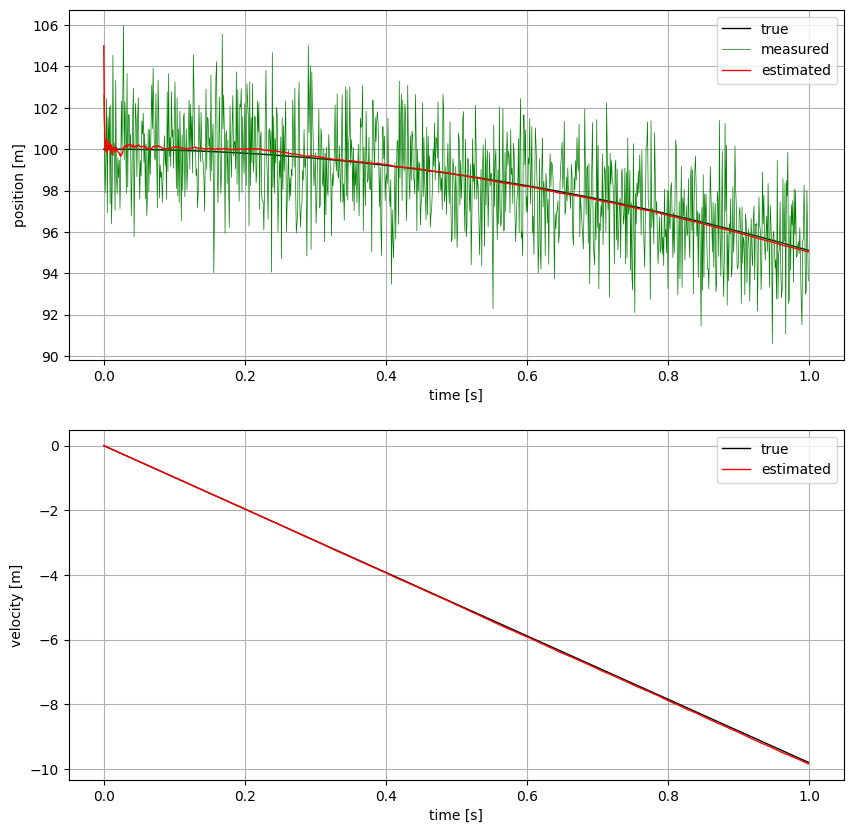

In [2]:
# display

fig1 = plt.figure(1, figsize=[10, 10])
ax_f11 = fig1.add_subplot(2, 1, 1)
ax_f11.plot(tvec, xt[0, :], linewidth=1, color='k', label='true')
ax_f11.plot(tvec, position_measured, linewidth=0.5, color='g', label='measured')
ax_f11.plot(tvec, xe[0, :], linewidth=1, color='r', label='estimated')

ax_f11.grid(True)
ax_f11.set_ylabel('position [m]')
ax_f11.set_xlabel('time [s]')
ax_f11.legend(loc='upper right')

ax_f12 = fig1.add_subplot(2, 1, 2)
ax_f12.plot(tvec, xt[1, :], linewidth=1, color='k', label='true')
ax_f12.plot(tvec, xe[1, :], linewidth=1, color='r', label='estimated')

ax_f12.grid(True)
ax_f12.set_ylabel('velocity [m]')
ax_f12.set_xlabel('time [s]')
ax_f12.legend(loc='upper right')


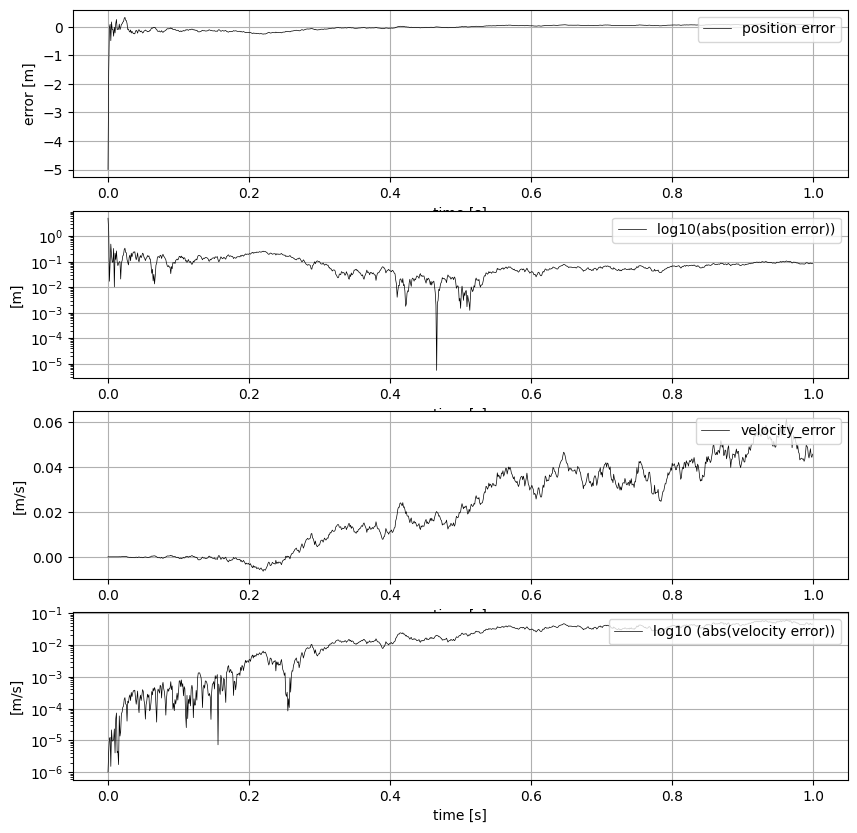

In [3]:
# display

fig2 = plt.figure(2, figsize=[10, 10])
ax_f21 = fig2.add_subplot(4, 1, 1)
ax_f21.plot(tvec, position_error, linewidth=0.5, color='k', label='position error')

ax_f21.grid(True)
ax_f21.set_ylabel('error [m]')
ax_f21.set_xlabel('time [s]')
ax_f21.legend(loc='upper right')

ax_f22 = fig2.add_subplot(4, 1, 2)
ax_f22.semilogy(tvec, np.abs(position_error) + 1e-6, linewidth=0.5, color='k', label='log10(abs(position error))')

ax_f22.grid(True)
ax_f22.set_ylabel('[m]')
ax_f22.set_xlabel('time [s]')
ax_f22.legend(loc='upper right')

ax_f23 = fig2.add_subplot(4, 1, 3)
ax_f23.plot(tvec, velocity_error, linewidth=0.5, color='k', label='velocity_error')

ax_f23.grid(True)
ax_f23.set_ylabel('[m/s]')
ax_f23.set_xlabel('time [s]')
ax_f23.legend(loc='upper right')

ax_f24 = fig2.add_subplot(4, 1, 4)
ax_f24.semilogy(tvec, np.abs(velocity_error) + 1e-6, linewidth=0.5, color='k', label='log10 (abs(velocity error))')

ax_f24.grid(True)
ax_f24.set_ylabel('[m/s]')
ax_f24.set_xlabel('time [s]')
ax_f24.legend(loc='upper right')